In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('odi.csv')

In [6]:
df.head(500)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,2006-09-05,The Rose Bowl,England,Pakistan,JWM Dalrymple,Shahid Afridi,146,4,29.4,21,0,21,10,271
496,2,2006-09-05,The Rose Bowl,England,Pakistan,JWM Dalrymple,Shahid Afridi,146,4,29.5,21,0,21,10,271
497,2,2006-09-05,The Rose Bowl,England,Pakistan,JWM Dalrymple,Shahid Afridi,147,4,29.6,22,0,21,11,271
498,2,2006-09-05,The Rose Bowl,England,Pakistan,JWM Dalrymple,Mohammad Hafeez,148,4,30.1,23,0,21,12,271


In [2]:
df=df.drop(['date'],axis=1)

In [8]:
teams = df.groupby(['bat_team','bowl_team','venue'])
bat = list(df.bat_team.unique())
bat
bowl = list(df.bowl_team.unique())
final_list = list(set(bat) | set(bowl)) 
final_list
teams.head()

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350589,1188,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,N Dickwella,Sikandar Raza,2,0,0.1,2,0,2,0,203
350590,1188,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,N Dickwella,Sikandar Raza,2,0,0.2,2,0,2,0,203
350591,1188,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,N Dickwella,Sikandar Raza,2,0,0.3,2,0,2,0,203
350592,1188,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,N Dickwella,Sikandar Raza,2,0,0.4,2,0,2,0,203


# Data Visualisation


In [3]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


In [7]:
df.dtypes

mid                 int64
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [8]:
df.shape

(350899, 14)

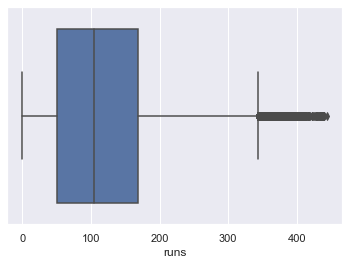

In [17]:
sns.boxplot(x=df['runs'])

In [45]:
wickets_by_team= df[df['bowl_team']=='Australia']
wickets_by_team

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
4065,14,2006-01-22,Sydney Cricket Ground,Sri Lanka,Australia,J Mubarak,B Lee,4,0,0.1,4,0,0,0,309
4066,14,2006-01-22,Sydney Cricket Ground,Sri Lanka,Australia,J Mubarak,B Lee,4,0,0.2,4,0,0,0,309
4067,14,2006-01-22,Sydney Cricket Ground,Sri Lanka,Australia,J Mubarak,B Lee,4,0,0.3,4,0,0,0,309
4068,14,2006-01-22,Sydney Cricket Ground,Sri Lanka,Australia,J Mubarak,B Lee,4,0,0.4,4,0,0,0,309
4069,14,2006-01-22,Sydney Cricket Ground,Sri Lanka,Australia,J Mubarak,B Lee,4,0,0.5,4,0,0,0,309
4070,14,2006-01-22,Sydney Cricket Ground,Sri Lanka,Australia,J Mubarak,B Lee,5,0,0.6,5,0,0,0,309
4071,14,2006-01-22,Sydney Cricket Ground,Sri Lanka,Australia,J Mubarak,NW Bracken,6,0,1.1,6,0,1,0,309
4072,14,2006-01-22,Sydney Cricket Ground,Sri Lanka,Australia,ST Jayasuriya,NW Bracken,8,0,1.2,8,0,2,1,309
4073,14,2006-01-22,Sydney Cricket Ground,Sri Lanka,Australia,ST Jayasuriya,NW Bracken,8,0,1.3,8,0,2,1,309
4074,14,2006-01-22,Sydney Cricket Ground,Sri Lanka,Australia,ST Jayasuriya,NW Bracken,8,0,1.4,8,0,2,1,309


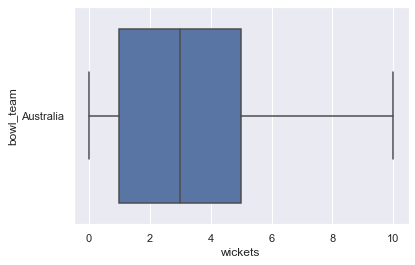

In [46]:
sns.boxplot(x=wickets_by_team['wickets'],y=wickets_by_team['bowl_team'])

[Text(0, 0.5, 'India'), Text(0.5, 0, 'Total Runs Scored')]

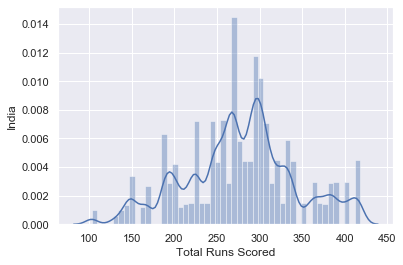

In [4]:
team_name = input()
team= df[df['bat_team']==team_name]
# team
total_by_team = team['total']
# total_by_team
ax=sns.distplot(total_by_team)
ax.set(xlabel="Total Runs Scored", ylabel =team_name)

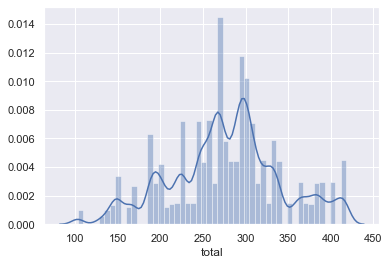

In [71]:
# sns.boxplot(x=total_by_team['total'],y=total_by_team['bat_team'])
sns.distplot(total_by_team)

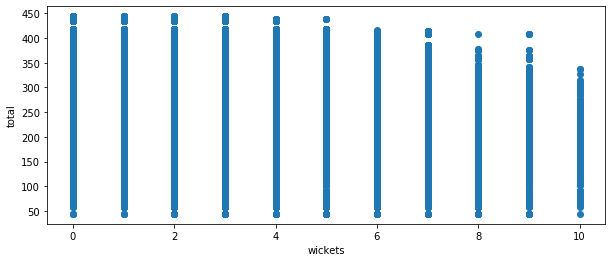

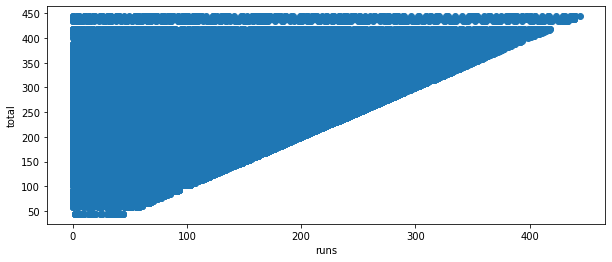

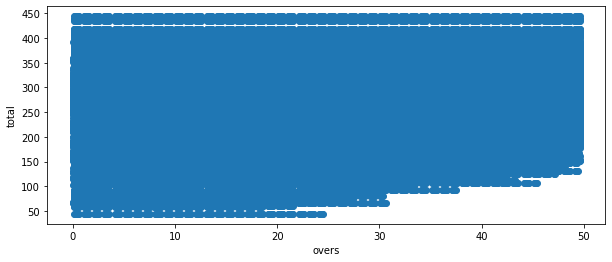

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df['wickets'] , df['total'])
ax.set_xlabel('wickets')
ax.set_ylabel('total')
plt.show()

fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df['runs'] , df['total'])
ax.set_xlabel('runs')
ax.set_ylabel('total')
plt.show()

fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df['overs'] , df['total'])
ax.set_xlabel('overs')
ax.set_ylabel('total')
plt.show()

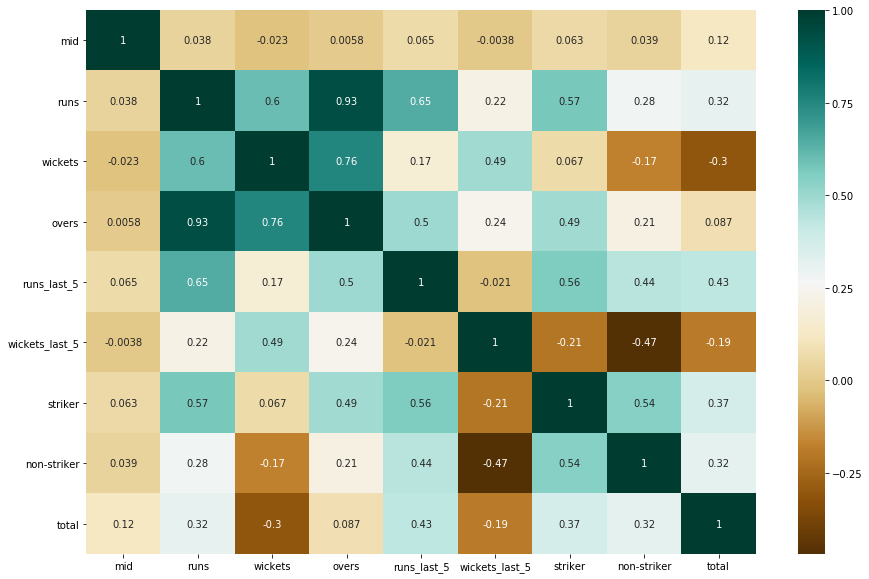

In [8]:
plt.figure(figsize=(15,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,30))
ax.scatter(df['total'] , df['venue'])
ax.set_xlabel('total')
ax.set_ylabel('venue')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(df['total'] , df['bat_team'])
ax.set_xlabel('total')
ax.set_ylabel('bat_team')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(df['total'] , df['bowl_team'])
ax.set_xlabel('total')
ax.set_ylabel('bowl_team')
plt.show()

In [ ]:
plt.figure(figsize=(4,3))
plt.hist(df.total)
plt.xlabel('Total')
plt.ylabel('Count')
plt.tight_layout

# We will now convert the textual data to numeric data so that those columns can be used for prediciton

In [5]:
df.head()

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [21]:
df.head()

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [23]:
df.head(15)

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,19,6,9,520,168,0,0,0.1,0,0,0,0,301
1,1,19,6,9,520,168,0,0,0.2,0,0,0,0,301
2,1,19,6,9,520,168,4,0,0.3,4,0,0,0,301
3,1,19,6,9,520,168,6,0,0.4,6,0,0,0,301
4,1,19,6,9,520,168,6,0,0.5,6,0,0,0,301
5,1,19,6,9,520,168,6,0,0.6,6,0,0,0,301
6,1,19,6,9,242,137,6,0,1.1,6,0,0,0,301
7,1,19,6,9,242,137,6,0,1.2,6,0,0,0,301
8,1,19,6,9,242,137,6,0,1.3,6,0,0,0,301
9,1,19,6,9,242,137,7,0,1.3,7,0,0,0,301


# Dividing Dependent and Independent Variables

In [6]:
x = df.iloc[:,[1,2,3,4,5,6,7,8,11,12]]
y = df.iloc[:, 13].values
x.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,striker,non-striker
0,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0
1,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0
2,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,0,0
3,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,0,0
4,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,0,0


In [7]:
from sklearn.preprocessing import LabelEncoder
le_bat=LabelEncoder()
le_bowl=LabelEncoder()
le_ven=LabelEncoder()
le_bats=LabelEncoder()
le_bowler=LabelEncoder()
df['bat_team']=le_bat.fit_transform(df['bat_team'])
df['venue']=le_ven.fit_transform(df['venue'])
df['bowl_team']=le_bowl.fit_transform(df['bowl_team'])
df['batsman']=le_bats.fit_transform(df['batsman'])
df['bowler']=le_bowler.fit_transform(df['bowler'])

In [8]:
z = df.iloc[:,[1,2,3,4,5,6,7,8,11,12]].values
w = df.iloc[:, 13].values
z

array([[19. ,  6. ,  9. , ...,  0.1,  0. ,  0. ],
       [19. ,  6. ,  9. , ...,  0.2,  0. ,  0. ],
       [19. ,  6. ,  9. , ...,  0.3,  0. ,  0. ],
       ...,
       [64. , 17. , 20. , ..., 49.4, 59. , 18. ],
       [64. , 17. , 20. , ..., 49.5, 59. , 18. ],
       [64. , 17. , 20. , ..., 49.6, 59. , 18. ]])

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, w, test_size = 0.3, random_state = 42)

# Scaling the Dependent and Independent Variables

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
x_test

array([[ 1.38945346, -0.7762766 , -1.49859867, ..., -0.83848189,
         0.31432054,  1.56739102],
       [-0.16567638,  1.00308481, -1.33232801, ...,  0.67232033,
         1.87916675,  1.03581   ],
       [ 1.41537229,  0.19428417,  0.82919054, ...,  0.01881053,
        -0.18358507,  0.43778135],
       ...,
       [ 0.35270023, -1.26155698,  1.49427317, ..., -0.26226895,
        -0.1124557 , -0.49248543],
       [-0.94324129,  1.32660506,  0.33037856, ...,  1.69123346,
         0.45657929, -0.09379966],
       [-1.22834843,  0.84132468, -0.33470407, ...,  0.53178059,
        -0.29027913,  0.10554322]])

# Linar Regression

In [12]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x_train,y_train)
pickle.dump(lin,open('model.pkl', 'wb'))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Testing the Accuracy

In [13]:
# Testing the dataset on trained model
from sklearn.metrics import r2_score,accuracy_score
y_pred = lin.predict(x_test)
score = lin.score(x_test,y_test)
print("R square value:" , score)

R square value: 0.5282371229584477


In [113]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0

    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

Custom accuracy: 43.45017573857699


# Test Case 

In [64]:
le_ven.classes_

array(['AMI Stadium', 'Adelaide Oval',
       'Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium',
       "Antigua Recreation Ground, St John's",
       'Arnos Vale Ground, Kingstown', 'Barabati Stadium',
       'Basin Reserve', 'Bay Oval', 'Beausejour Stadium, Gros Islet',
       'Bellerive Oval', 'Bert Sutcliffe Oval', 'Boland Park',
       'Brabourne Stadium', 'Brisbane Cricket Ground, Woolloongabba',
       'Buffalo Park', 'Cambusdoon New Ground',
       'Captain Roop Singh Stadium', 'Chevrolet Park',
       'Chittagong Divisional Stadium',
       'Civil Service Cricket Club, Stormont',
       'Clontarf Cricket Club Ground', 'Cobham Oval (New)',
       'County Ground',
       'Darren Sammy National Cricket Stadium, Gros Islet',
       'De Beers Diamond Oval', 'Docklands Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Dubai International Cricket Stadium',
       'Dubai Sports City Cricket Stadium', 'Eden Gardens', 'Eden Par

In [38]:
le_bowl.classes_

array(['A Bagai', 'A Balbirnie', 'A Dananjaya', 'A Flintoff', 'A Kumble',
       'A Martin', 'A Mishra', 'A Nehra', 'A Nel', 'A Shahzad',
       'A Shamshudeen', 'A Symonds', 'A Vala', 'A Zampa', 'AA Mulla',
       'AA Obanda', 'AB Agarkar', 'AB Barath', 'AB Dinda',
       'AB de Villiers', 'AC Botha', 'AC Cummins', 'AC Evans',
       'AC Gilchrist', 'AC Voges', 'AD Hales', 'AD Mascarenhas',
       'AD Mathews', 'AD Poynter', 'AD Russell', 'ADJ Pitcher',
       'ADS Fletcher', 'AF Buurman', 'AF Milne', 'AG Cremer', 'AG Prince',
       'AJ Finch', 'AJ Hall', 'AJ Ireland', 'AJ McKay', 'AJ Redmond',
       'AJ Strauss', 'AK Perera', 'AL Kandappah', 'AL Phehlukwayo',
       'AM Blignaut', 'AM Ellis', 'AM Guruge', 'AM Phangiso', 'AM Rahane',
       'AM Samad', 'AN Cook', 'AN Kervezee', 'AN Petersen', 'AO Suji',
       'AP Devcich', 'AR Adams', 'AR Berenger', 'AR Cusack', 'AR McBrine',
       'AR Nurse', 'AR Patel', 'AR Pitcher', 'AR White', 'AS Hansra',
       'AS Joseph', 'AT Rayudu', 'AU 

In [91]:
venue="Sardar Patel Stadium, Motera"
bat_team="India"
bowl_team="Australia"
batsman="MS Dhoni"
bowler="A Symonds"
runs=
wickets=1
overs=3.2
striker=11
non_striker=29
#first toss, then choose batting and bowling team. next choose one star batsman and one star bowler resp. make it 


v=[venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,striker,non_striker]
print(v)
encoders=[le_ven,le_bat,le_bowl,le_bats,le_bowler]
for i in range(5):
    v[i]=encoders[i].transform([v[i]])
    


# le.inverse_transform

# #venue	bat_team	bowl_team	batsman	bowler	runs	wickets	overs	striker	non-striker
new_prediction = lin.predict(sc.transform(np.array([v])))
print("Prediction score:" , new_prediction)

['Sardar Patel Stadium, Motera', 'India', 'Australia', 'MS Dhoni', 'A Symonds', 5, 1, 3.2, 11, 29]
Prediction score: [235.27682797]


In [51]:
new_prediction_2 = lin.predict(sc.transform(np.array([[5,10,7,112,127,100,1,20,80,10]])))
print("Prediction score:" , new_prediction_2)

Prediction score: [266.35015977]


In [69]:
new_prediction_3 = lin.predict(sc.transform(np.array([[56,13,4,14,24,0,0,0.1,34,12]])))
print("Prediction score:" , new_prediction_3)

Prediction score: [275.49599758]


# Decision Tree Regressor

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred1 = clf.predict(x_test)

# Testing the accuracy

In [19]:
y_pred1 = clf.predict(x_test)
score1 = clf.score(x_test,y_test)
print("R square value:" , score1)

R square value: 0.9909945853519522


In [20]:
def custom_accuracy1(y_test,y_pred1,thresold):
    right = 0
    l = len(y_pred1)
    for i in range(0,l):
        if(abs(y_pred1[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

print("Custom accuracy:" , custom_accuracy1(y_test,y_pred1,20),'%')

Custom accuracy: 99.36829106108102 %


In [43]:
df.head()

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,19,6,9,520,168,0,0,0.1,0,0,0,0,301
1,1,19,6,9,520,168,0,0,0.2,0,0,0,0,301
2,1,19,6,9,520,168,4,0,0.3,4,0,0,0,301
3,1,19,6,9,520,168,6,0,0.4,6,0,0,0,301
4,1,19,6,9,520,168,6,0,0.5,6,0,0,0,301


# Test Case

In [84]:
venue="Sardar Patel Stadium, Motera"
bat_team="Zimbabwe"
bowl_team="Australia"
batsman="MS Dhoni"
bowler="A Symonds"
runs=0
wickets=0
overs=3.2
striker=11
non_striker=12
#first toss, then choose batting and bowling team. next choose one star batsman and one star bowler resp. make it 


aaa=[venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,striker,non_striker]
print(aaa)
encoders=[le_ven,le_bat,le_bowl,le_bats,le_bowler]
for i in range(5):
    aaa[i]=encoders[i].transform([aaa[i]])

print(aaa)
    

new_prediction = clf.predict(sc.transform(np.array([aaa])))
print("Prediction score:" , new_prediction)

['Sardar Patel Stadium, Motera', 'Zimbabwe', 'Australia', 'MS Dhoni', 'A Symonds', 0, 0, 3.2, 11, 12]
[array([100]), array([20]), array([2]), array([559]), array([11]), 0, 0, 3.2, 11, 12]
Prediction score: [217]


In [82]:
new_prediction_2 = clf.predict(sc.transform(np.array([[5,4,7,112,127,1,1,10.5,80,10]])))
print("Prediction score:" , new_prediction_2)

Prediction score: [270]


In [52]:
encoders=[le_ven,le_bat,le_bowl,le_bats,le_bowler]
q=[56,13,4,14,24,75,5,4.3,34,12]
for i in range(5):
    q[i]=encoders[i].inverse_transform([q[i]])

print(q)



new_prediction_3 = clf.predict(sc.transform(np.array([[56,13,4,14,24,75,5,4.3,34,12]])))
print("Prediction score:" , new_prediction_3)

[array(['Kingsmead'], dtype=object), array(['Pakistan'], dtype=object), array(['Bermuda'], dtype=object), array(['AA Mulla'], dtype=object), array(['AD Mathews'], dtype=object), 75, 5, 4.3, 34, 12]
Prediction score: [246]


# Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_features=None)
reg.fit(x_train,y_train)

KeyboardInterrupt: 

# Testing the accuracy

In [ ]:
# Testing the dataset on trained model
y_pred2 = reg.predict(x_test)
score2 = reg.score(x_test,y_test)
print("R square value:" , score2)

In [ ]:
def custom_accuracy1(y_test,y_pred2,thresold):
    right = 0
    l = len(y_pred2)
    for i in range(0,l):
        if(abs(y_pred2[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

print("Custom accuracy:" , custom_accuracy1(y_test,y_pred2,20),'%')

# Test Case

In [ ]:
new_prediction = reg.predict(sc.transform(np.array([[100,12,2,391,283,50,4,5.2,11,12]])))
print("Prediction score:" , new_prediction)

In [ ]:
list(le.inverse_transform([12,2,391,283,50,4,11]))

In [ ]:
new_prediction_2 = reg.predict(sc.transform(np.array([[5,10,7,112,127,100,1,8.5,80,10]])))
print("Prediction score:" , new_prediction_2)

In [ ]:
new_prediction_3 = reg.predict(sc.transform(np.array([[56,13,4,14,24,75,5,4.3,34,12]])))
print("Prediction score:" , new_prediction_3)